## **Heart Attacks Exploratory Data Analysis and Logistic Regression**

### Import required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

#### **About Dataset**

`age:` Age of the person

`sex:` Gender of the person

`cp:` Chest Pain type chest pain type

*Value 1:* typical angina
*Value 2:* atypical angina
*Value 3:* non-anginal pain
*Value 4:* asymptomatic

`trtbps:` resting blood pressure (in mm Hg)

`chol:` cholestoral in mg/dl fetched via BMI sensor

`fbs:` (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

`restecg:` resting electrocardiographic results

*Value 0:* normal

*Value 1:* having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

*Value 2:* showing probable or definite left ventricular hypertrophy by Estes' criteria

`thalachh:` maximum heart rate achieved

`exng:` exercise induced angina (1 = yes; 0 = no)

`oldpeak:` Previous peak

`slp:` Slope

`caa:` number of major vessels (0-3)

`thall:` Thal rate

`output:` Target variable

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Basic Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Handling missing data and duplications

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace =True)

### Statistical Summary

In [7]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### **Exploratory Data Analysis (EDA)**

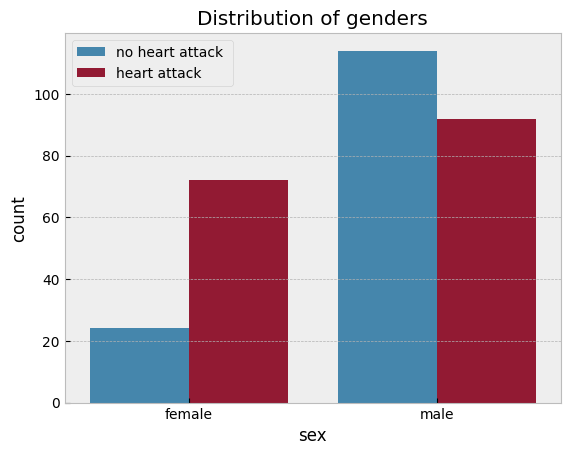

In [8]:
sns.countplot(df, x ='sex', hue ='output')
plt.title('Distribution of genders')
plt.xticks([0,1],['female', 'male'])
plt.legend(['no heart attack ', 'heart attack'])
plt.show()

**Among total females, there are more females to have heart attack while the case is opposite for males. According to the data, females are more prone to getting heart attacks in proportion to men.**

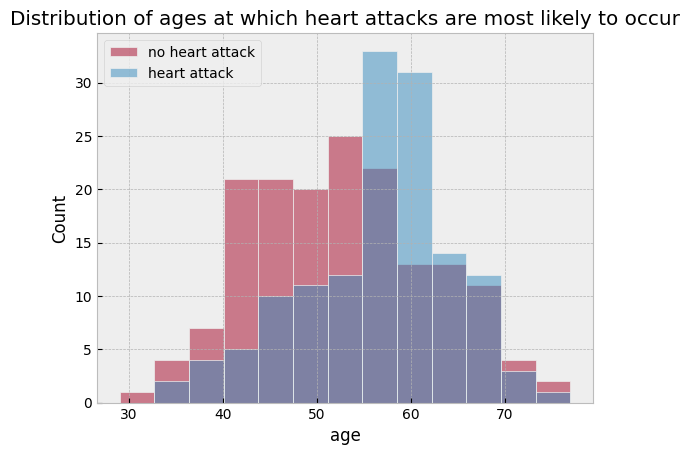

In [9]:
sns.histplot(df, x ='age', hue= 'output')
plt.title('Distribution of ages at which heart attacks are most likely to occur')
plt.legend(['no heart attack', 'heart attack'])
plt.show()

**Most people fall into the age range of 40 to 62 years.**

In [10]:
chest_pain_map = {
    0: 'typical angina',
    1: 'atypical angina',
    2: 'non-anginal pain',
    3: 'asymptomatic',
}

exr_ind = {
    0: 'exercise induced',
    1: 'natural cause'
}

heart_attack = {
    0: 'no heart attack',
    1: 'heart attack'
}

df_sunburst = df[['cp', 'exng', 'output']].copy(deep =True)
df_sunburst.cp = df_sunburst.cp.map(chest_pain_map)
df_sunburst.exng = df_sunburst.exng.map(exr_ind)
df_sunburst.output = df_sunburst.output.map(heart_attack)

fig = px.sunburst(
    df_sunburst,
    path=['output', 'cp','exng'],
    height = 1000,
)

fig.update_layout(
    title =dict(
        text= 'Distribution of chest pains which lead to Heart Attack ',
        x =0.5
    ),
    margin = dict(t=50, l=0, r=0, b=10)
    )
fig.show()



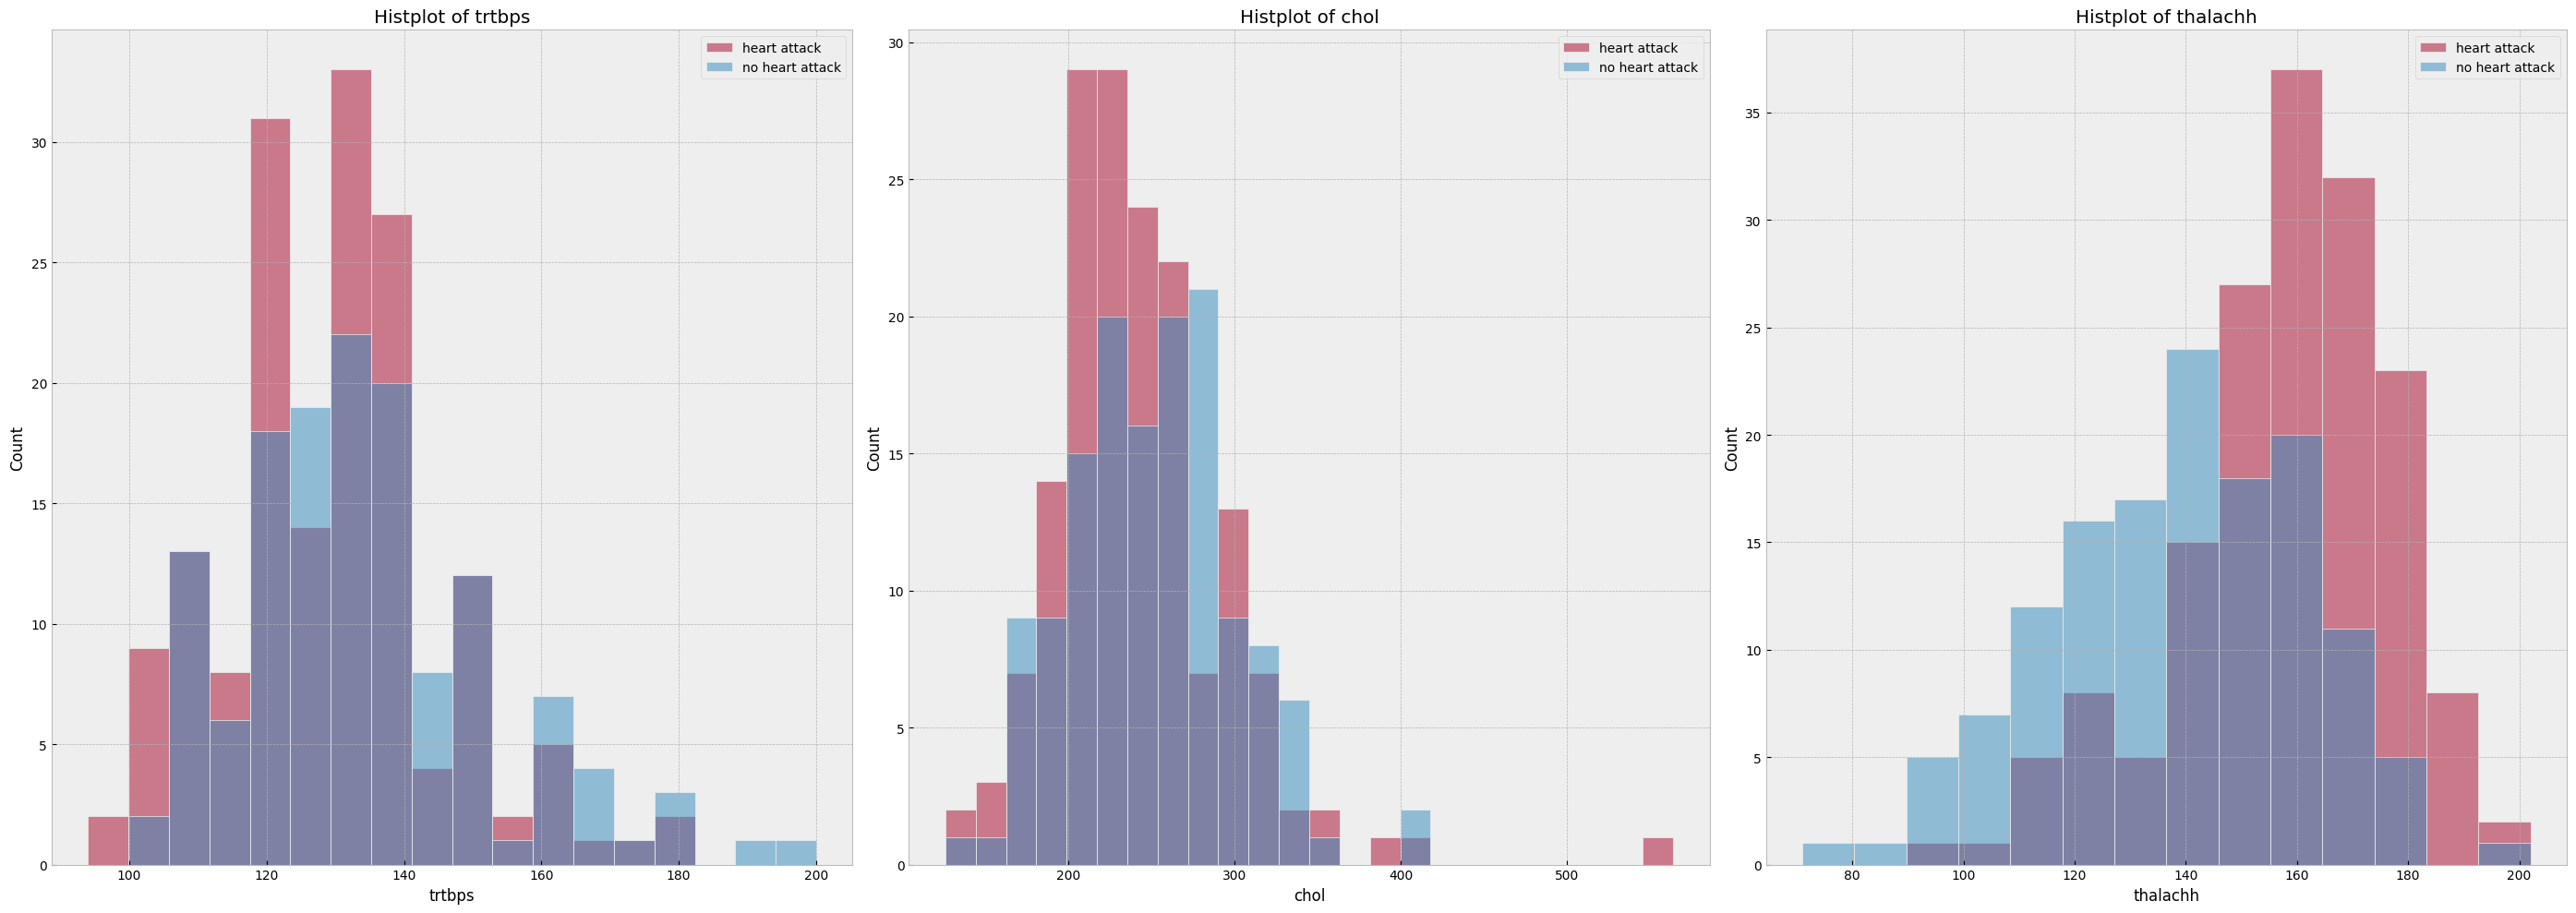

In [11]:
rows, cols = 1,3

fig, axes = plt.subplots(rows, cols, figsize =(28,10))

for ind, column in enumerate(['trtbps', 'chol', 'thalachh']):
    row = ind// cols
    col = ind%cols
    
    sns.histplot(df, x =column, hue ='output', ax =axes[col])
    axes[col].legend(['heart attack', 'no heart attack'])
    axes[col].set_title(f'Histplot of {column}')
    
fig.tight_layout()    

1. The majority of individuals have resting blood pressure readings between 120 and 140 mmHg.

2. Most people's cholesterol levels fall between 200 and 290 mg/dl.

3. The maximum heart rate achieved by most individuals ranges from 145 to 175 bpm.

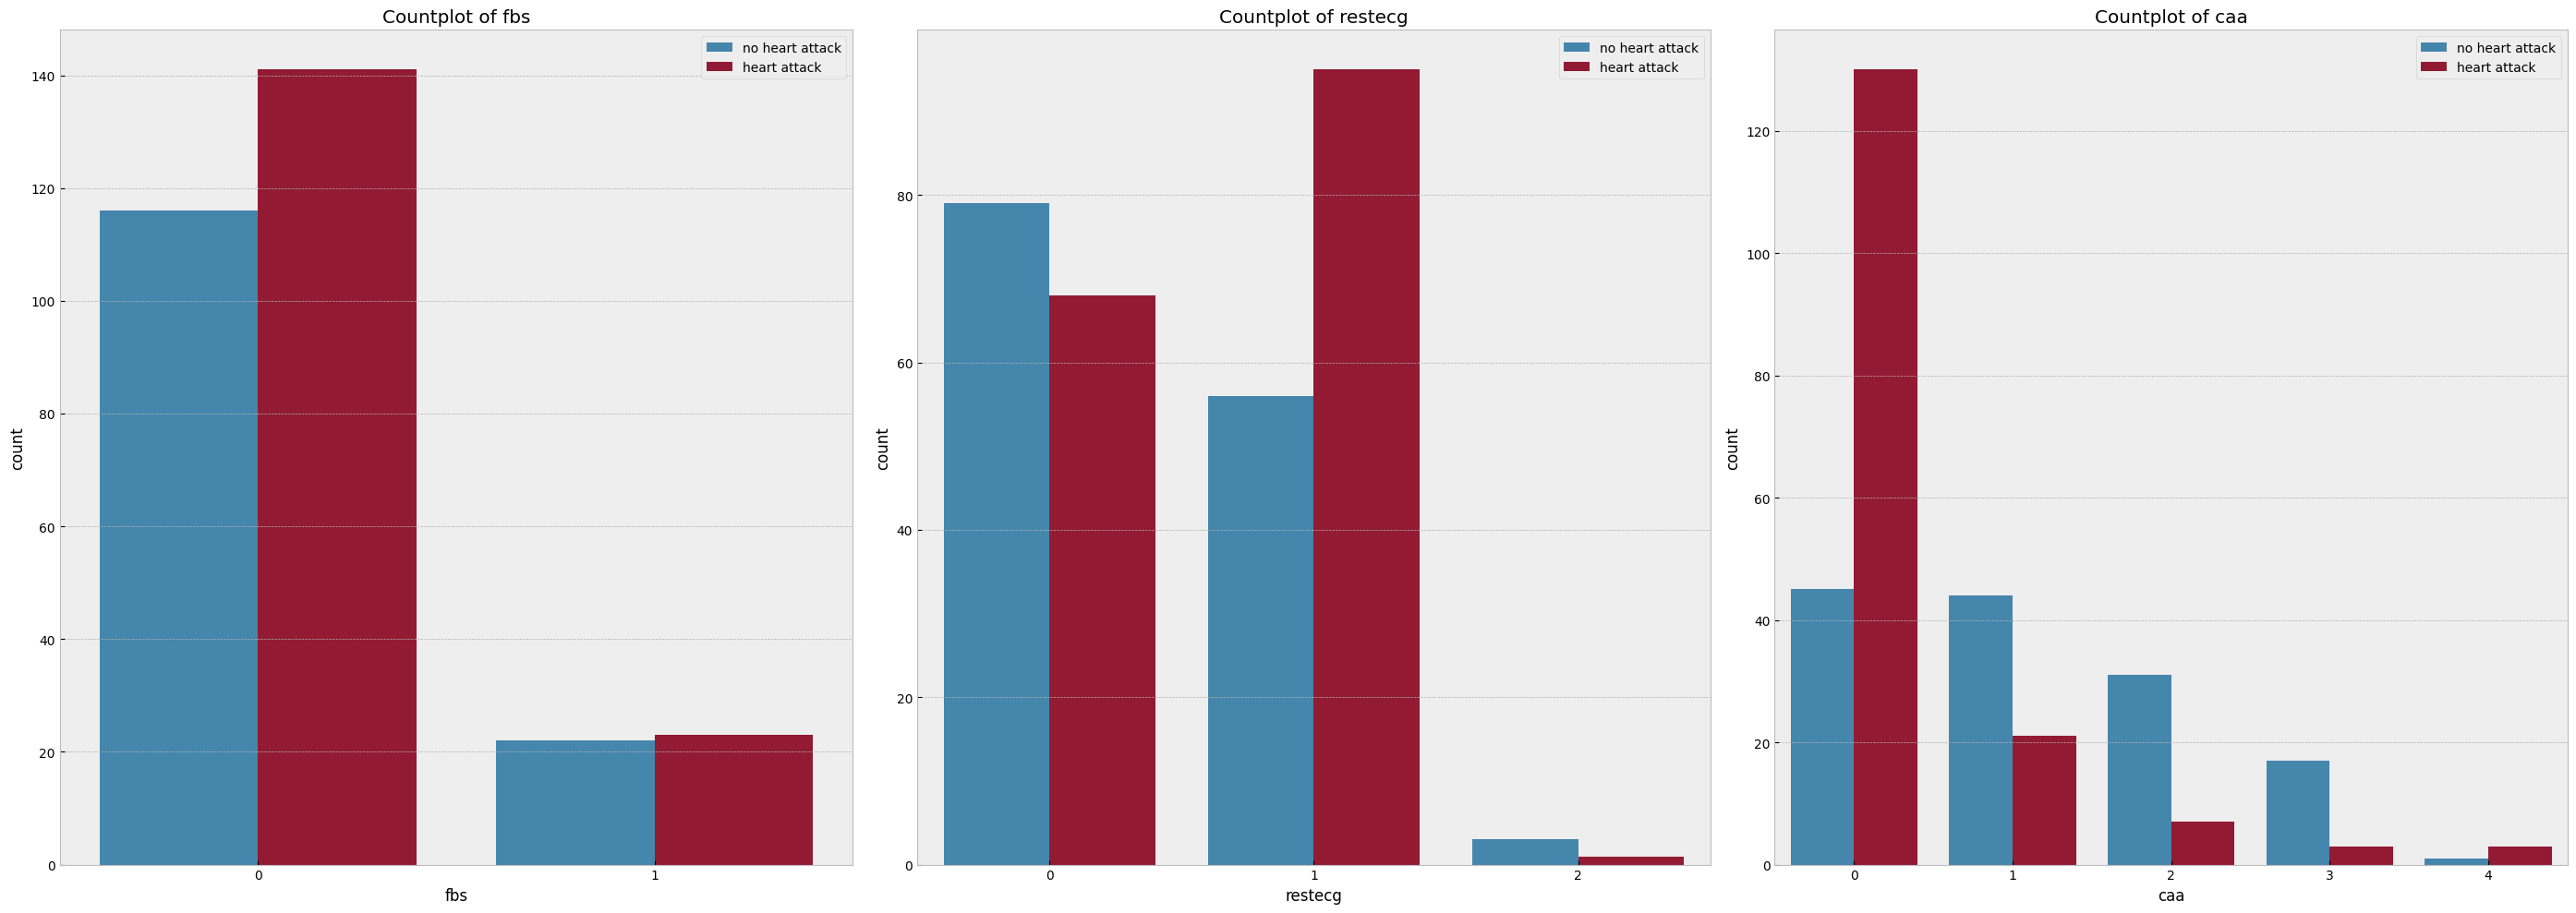

In [12]:
rows, cols = 1, 3
fig, axes = plt.subplots(rows, cols, figsize = (28, 10))

for ind, column in enumerate(['fbs', 'restecg', 'caa']):
    row = ind//cols
    col = ind %cols
    
    sns.countplot(df, x =column, hue ='output', ax = axes[col])
    
    axes[col].legend(['no heart attack', 'heart attack'])
    axes[col].set_title(f'Countplot of {column}')
    
fig.tight_layout()    

1. The majority of individuals have fasting blood pressure levels below 120 mg/dl, and many in this group experience heart attacks.

2. Most people exhibit resting electrocardiographic results with ST-T wave abnormalities, and a significant number of these individuals suffer heart attacks.

3. A large proportion of individuals have zero major vessels. Interestingly, the more major vessels a person has, the lower their risk of heart attack, except for those with four major vessels, who face a heightened risk.

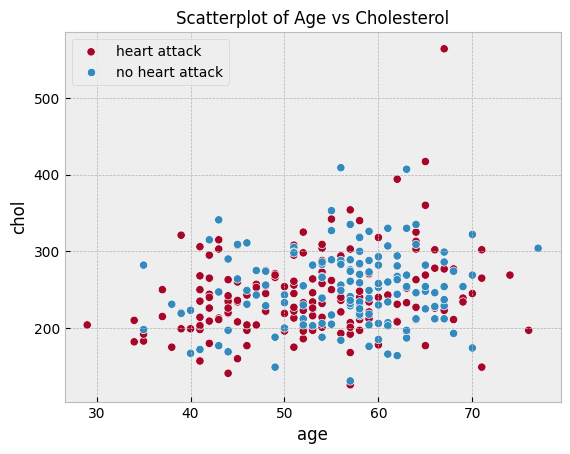

In [13]:
sns.scatterplot(df, x ='age', y ='chol', hue ='output')
plt.legend(['heart attack', 'no heart attack'])
plt.title('Scatterplot of Age vs Cholesterol', fontsize =12)
plt.show()

Scatterplot of age vs chol levels shows no significant correlation. 

In [14]:
df[['age', 'chol']].corr()

,age,chol
age,1.000000,0.207216
chol,0.207216,1.000000


In [15]:
df[['sex', 'chol']].corr()

,sex,chol
sex,1.000000,-0.195571
chol,-0.195571,1.000000


Even sex and chol level shows negative correlation.

### **Logistic Regression**

Preparing data for training

<Axes: >

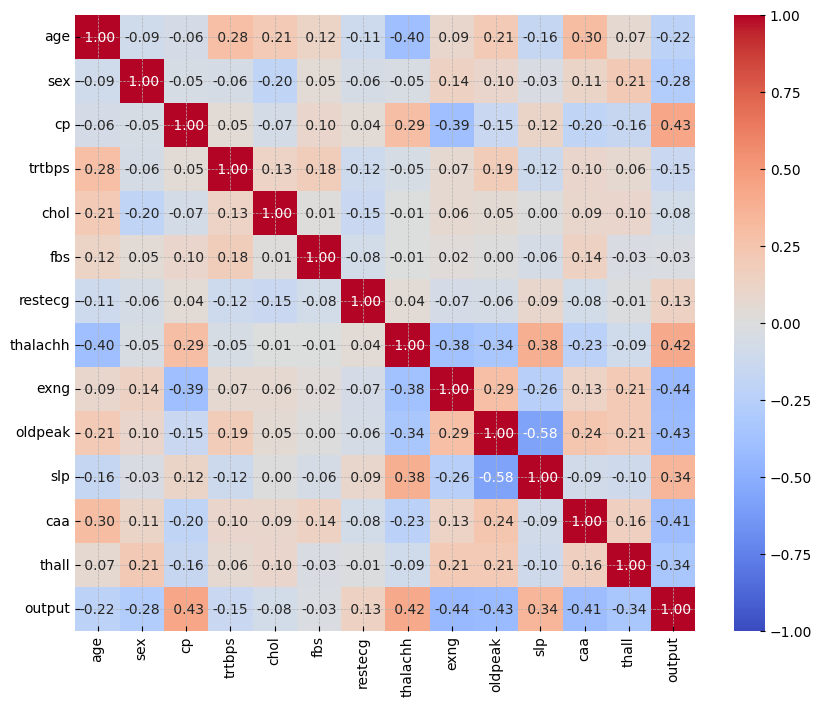

In [16]:
plt.figure(figsize =(10,8))

sns.heatmap(
    df.corr(),
    annot=True,
    fmt= ' .2f',
    cmap ='coolwarm',
    vmin =-1, vmax =1
)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_curve, precision_score, recall_score,
    f1_score
)

import statsmodels.api as sm

In [18]:
X= df.drop('output', axis =1)
features_names = X.columns
y = df.output.reset_index(drop =True)

X= StandardScaler().fit_transform(X)
X =pd.DataFrame(X, columns= features_names)
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [19]:
model = sm.Logit(y_train, X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.364983
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  241
Model:                          Logit   Df Residuals:                      227
Method:                           MLE   Df Model:                           13
Date:                Sat, 02 Nov 2024   Pseudo R-squ.:                  0.4693
Time:                        10:06:35   Log-Likelihood:                -87.961
converged:                       True   LL-Null:                       -165.75
Covariance Type:            nonrobust   LLR p-value:                 1.545e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2202      0.198      1.113      0.266      -0.168       0.608
age           -0.0755      0.231     -0.327      0.744      -0.528       0.377
sex           -0.6086      0.231     -2.633      0.008      -1.062      -0.156
cp             0.9922      0.217      4.570      0.000       0.567       1.418
trtbps        -0.1584      0.203     -0.779      0.436      -0.557       0.240
chol          -0.1301      0.215     -0.605      0.545      -0.551       0.291
fbs            0.0097      0.206      0.047      0.962      -0.394       0.413
restecg        0.2189      0.198      1.104      0.270      -0.170       0.608
thalachh       0.2314      0.257      0.901      0.368      -0.272       0.735
exng          -0.5025      0.211     -2.383      0.017      -0.916      -0.089
oldpeak       -0.6753      0.276     -2.449      0.014      -1.216      -0.135
slp            0.2796      0.239      1.172      0.241      -0.188       0.747
caa           -0.6935      0.215     -3.223      0.001      -1.115      -0.272
thall         -0.6214      0.201     -3.096      0.002      -1.015      -0.228
==============================================================================
"""

`Intercept (const):` 0.2202
> Not statistically significant (p=0.266), suggesting no significant baseline odds when all predictors are zero.

`Age:` -0.0755
> Not statistically significant (p=0.744), indicating age doesn't significantly impact heart attack probability.

`Sex:` -0.6086
> Statistically significant (p=0.008), showing a notable difference between genders. Negative value suggests females (coded as 0) are less likely to have a heart attack compared to males (coded as 1).

`Chest Pain (cp):` 0.9922
>Statistically significant (p<0.001). Higher values (indicating types other than typical angina) greatly increase heart attack odds.

`Resting Blood Pressure (trtbps):` -0.1584
>Not statistically significant (p=0.436), showing minimal impact on heart attack probability.

`Cholesterol (chol):` -0.1301
>Not statistically significant (p=0.545), suggesting cholesterol levels don't significantly predict heart attack risk in this model.

`Fasting Blood Sugar (fbs):` 0.0097
>Not statistically significant (p=0.962), indicating fasting blood sugar levels are not a strong predictor.

`Resting Electrocardiographic Results (restecg):` 0.2189
>Not statistically significant (p=0.270), showing minimal impact.

`Maximum Heart Rate Achieved (thalachh):` 0.2314
>Not statistically significant (p=0.368), indicating heart rate achieved isn't a strong predictor.

`Exercise-Induced Angina (exng):` -0.5025
>Statistically significant (p=0.017). Negative coefficient suggests those without exercise-induced angina are less likely to have a heart attack.

`Oldpeak:` -0.6753
>Statistically significant (p=0.014). Higher oldpeak values (ST depression) increase the likelihood of a heart attack.

`Slope (slp):` 0.2796
>Not statistically significant (p=0.241), indicating the slope of the peak exercise ST segment is not a strong predictor.

`Number of Major Vessels (caa):` -0.6935
>Statistically significant (p=0.001). Fewer major vessels visualized increases the likelihood of a heart attack.

`Thal Rate (thall):` -0.6214
>Statistically significant (p=0.002). Abnormal thall rates indicate a higher probability of heart attack.